In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("/Users/marissac/caffe/examples/pycaffe/layers")

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make sure that caffe is on the python path:
caffe_root = '../../'  # this file is expected to be in {caffe_root}/examples
import os
os.chdir(caffe_root)

import caffe
import multibox_util

from google.protobuf import text_format
from caffe.proto import caffe_pb2

CAFFE_LABEL_TO_CHAR_MAP = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: 'a',
    11: 'b',
    12: 'c',
    13: 'd',
    14: 'e',
    15: 'f',
    16: 'g',
    17: 'h',
    18: 'i',
    19: 'j',
    20: 'k',
    21: 'l',
    22: 'm',
    23: 'n',
    24: 'o',
    25: 'p',
    26: 'q',
    27: 'r',
    28: 's',
    29: 't',
    30: 'u',
    31: 'v',
    32: 'w',
    33: 'x',
    34: 'y',
    35: 'z',
    36: ' ',
    37: '\0',
    38: '\0'
}

combo_weights = '/Users/marissac/caffe/examples/ocr/detect_2444000_read_140000_combo_final.caffemodel'
model_combo = '/Users/marissac/caffe/examples/ocr/train_detectReadCombo.prototxt'
                    
net_combo = caffe.Net(model_combo,combo_weights,caffe.TEST)

net_combo.forward()  
                     

{'conf_loss': array(10.964521408081055, dtype=float32),
 'label_pad': array([[[[  4.00000000e+00,   1.00000000e+00,   0.00000000e+00,
             2.46582029e-04,   9.57785465e-04,   5.58789237e-04,
             1.06011715e-03,   0.00000000e+00],
          [  5.00000000e+00,   1.00000000e+00,   0.00000000e+00,
             1.68426125e-03,   6.28955662e-04,   1.85114215e-03,
             6.92246773e-04,   0.00000000e+00],
          [  6.00000000e+00,   1.00000000e+00,   0.00000000e+00,
             1.33978180e-03,   1.70262274e-03,   1.53025810e-03,
             1.89297809e-03,   0.00000000e+00],
          [  6.00000000e+00,   1.00000000e+00,   1.00000000e+00,
             1.23046874e-03,   1.82725699e-03,   1.32080074e-03,
             1.90104172e-03,   0.00000000e+00],
          [  6.00000000e+00,   1.00000000e+00,   2.00000000e+00,
             1.07910158e-03,   1.82291667e-03,   1.14746089e-03,
             1.90104172e-03,   0.00000000e+00],
          [  6.00000000e+00,   1.00000000

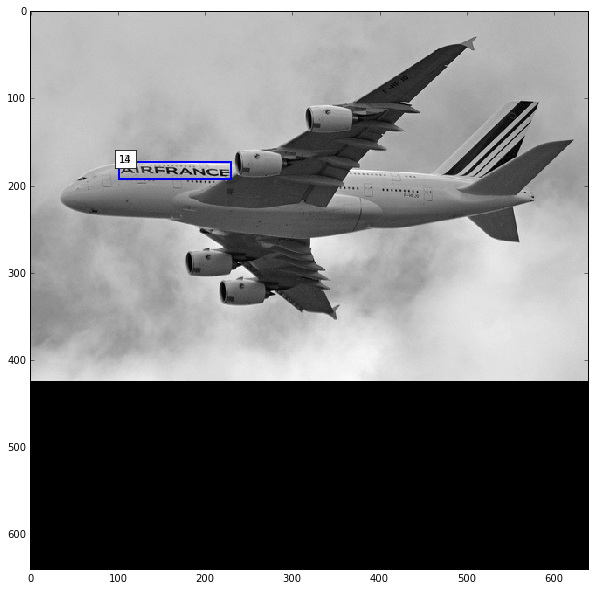

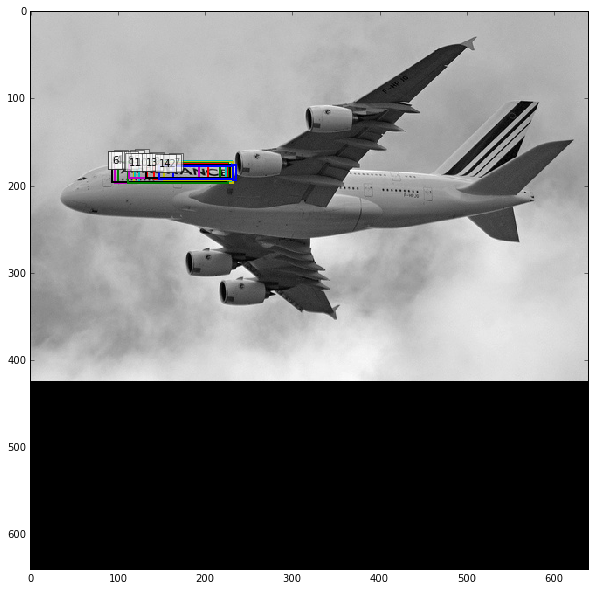

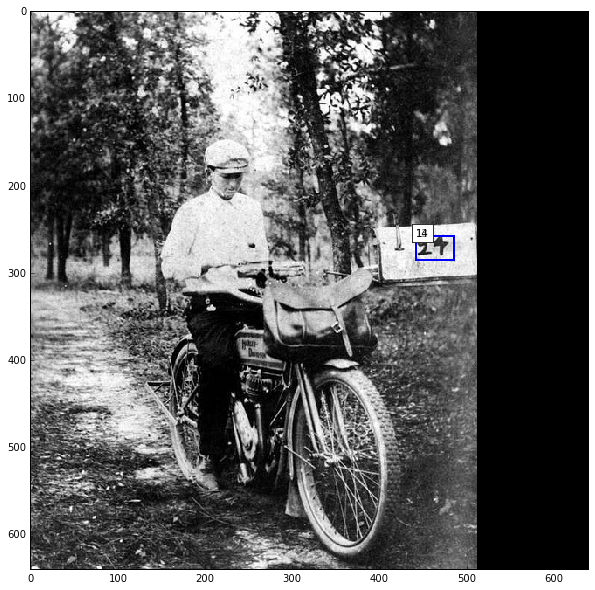

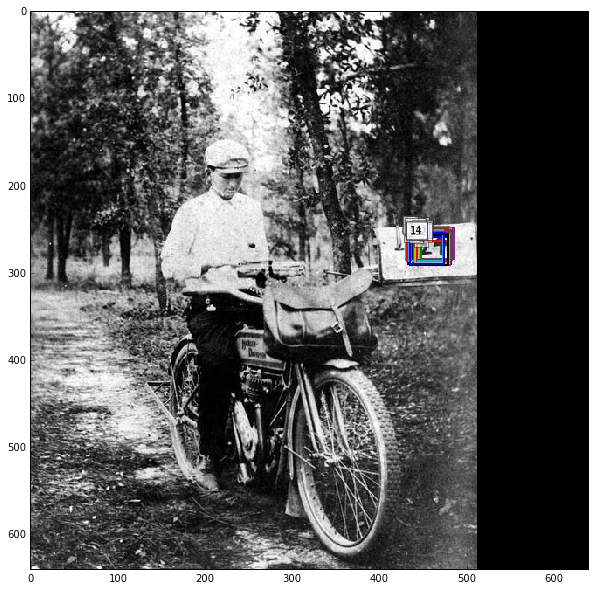

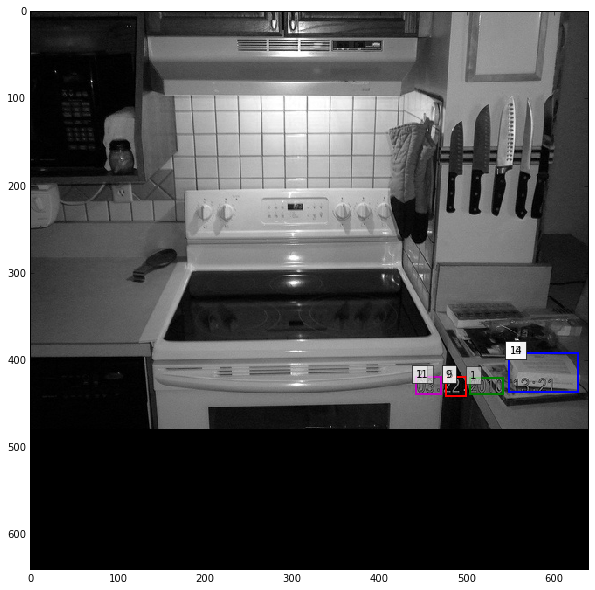

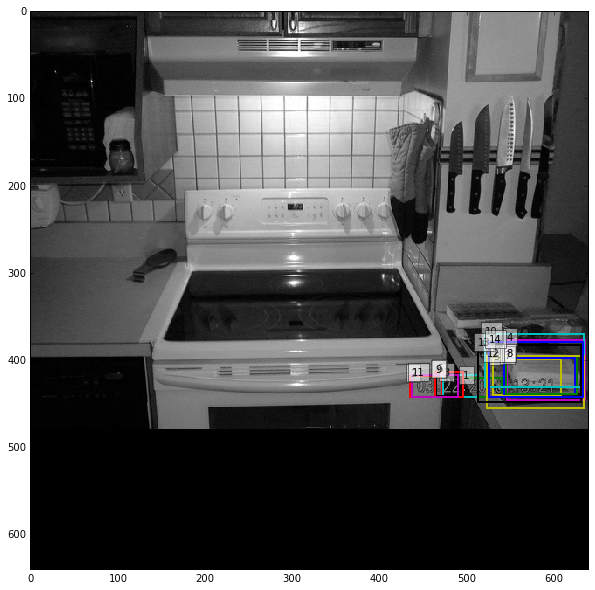

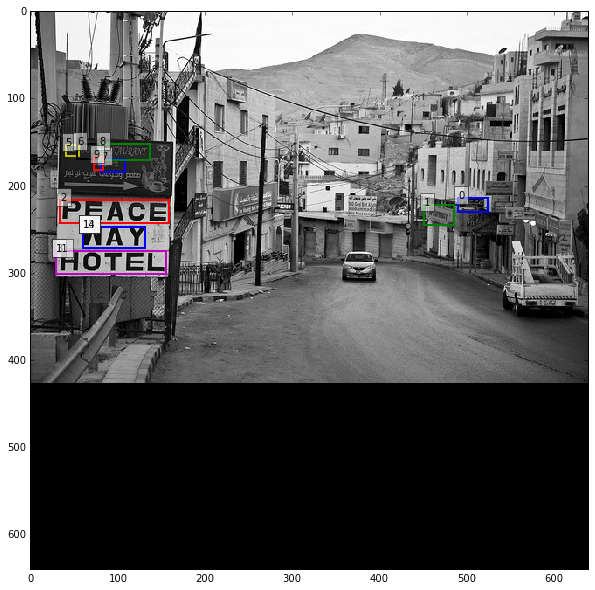

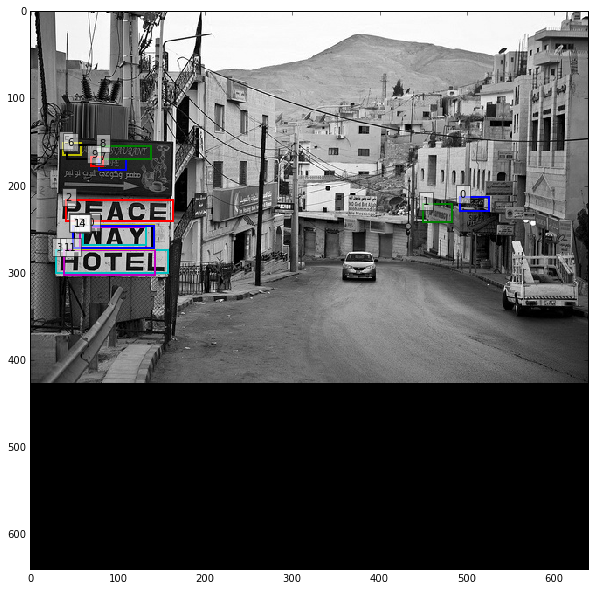

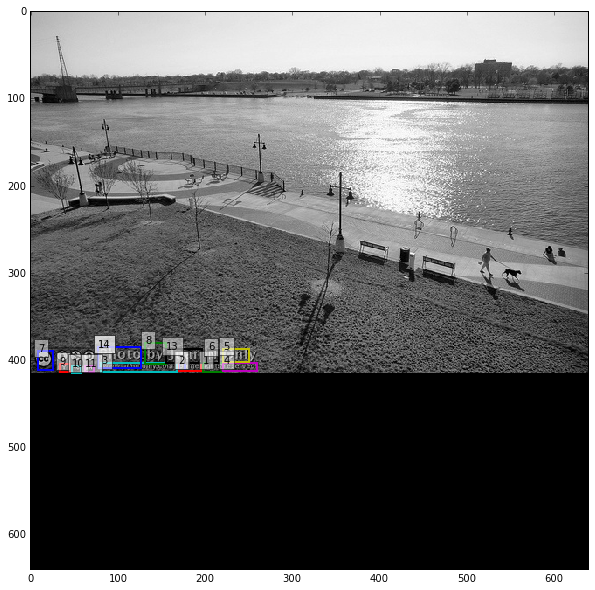

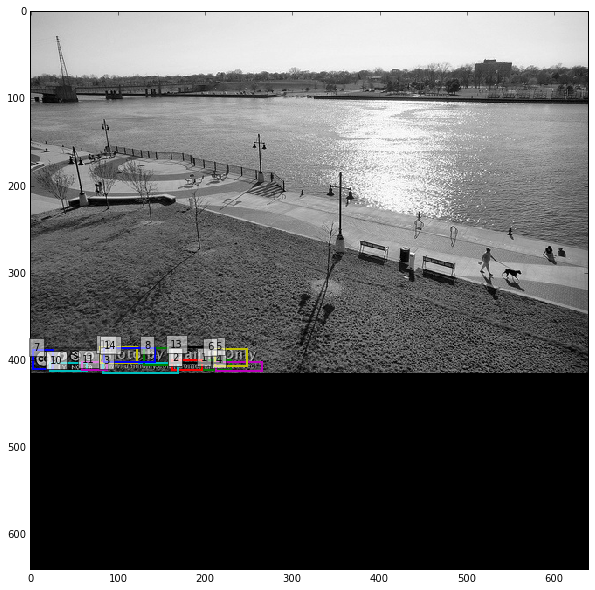

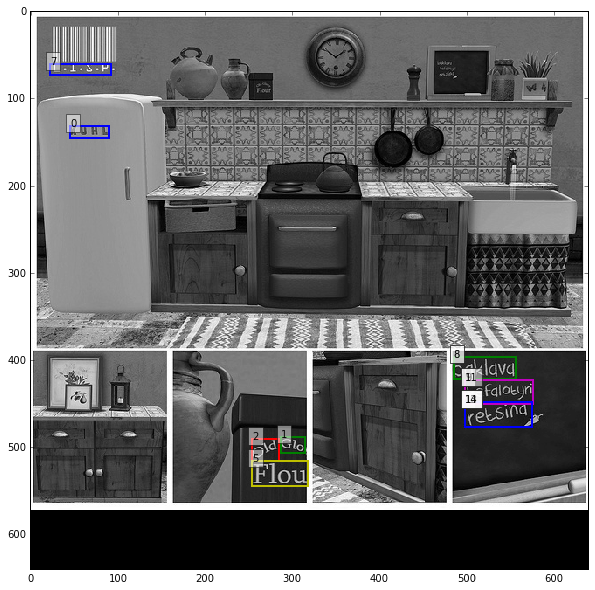

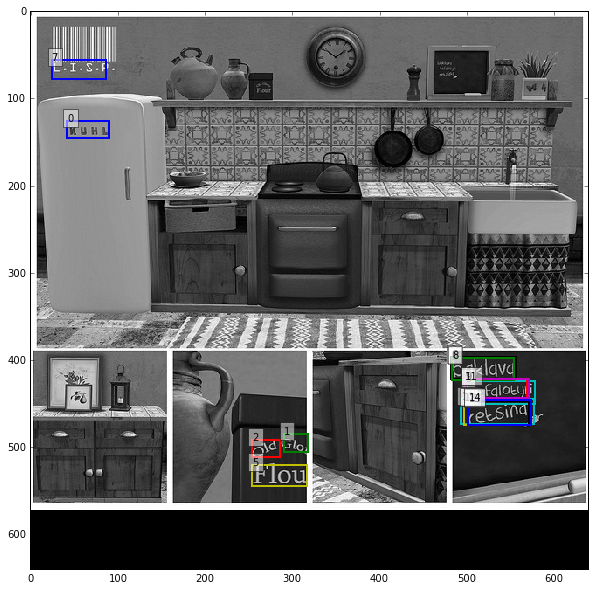

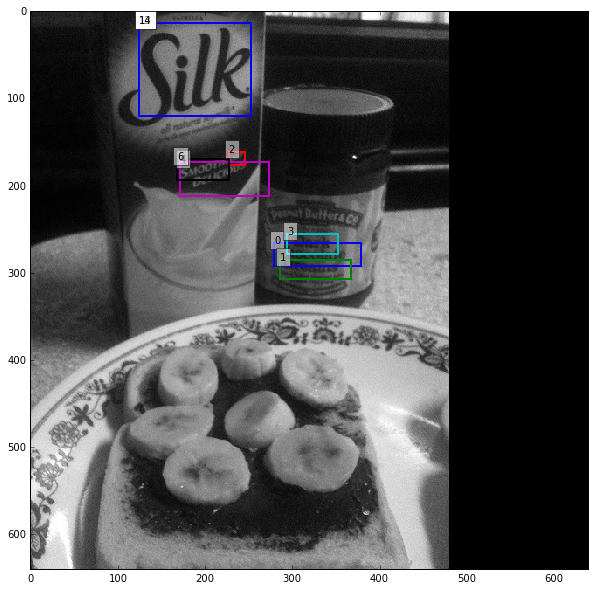

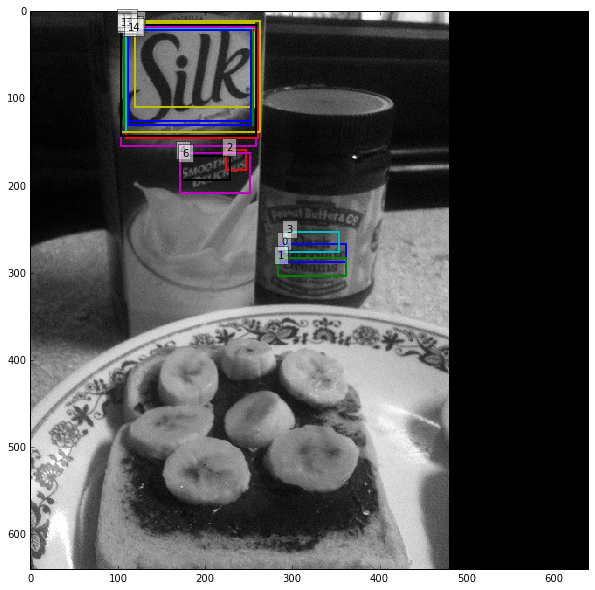

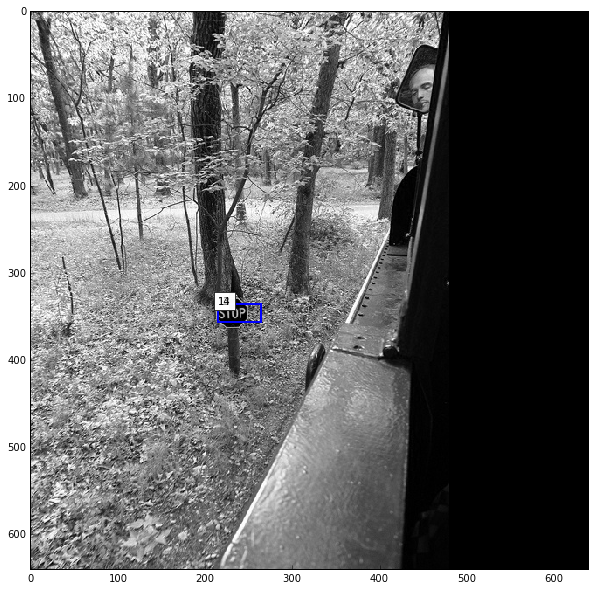

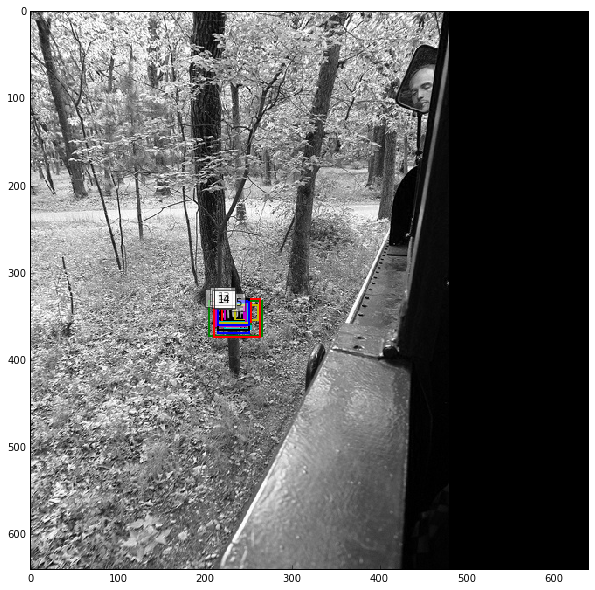

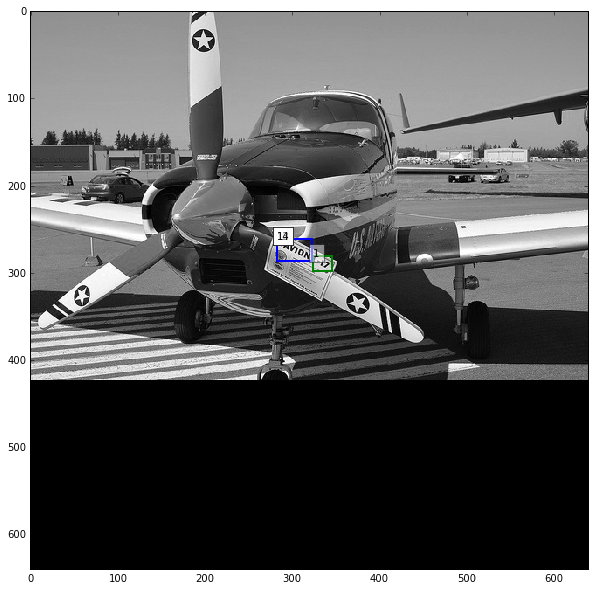

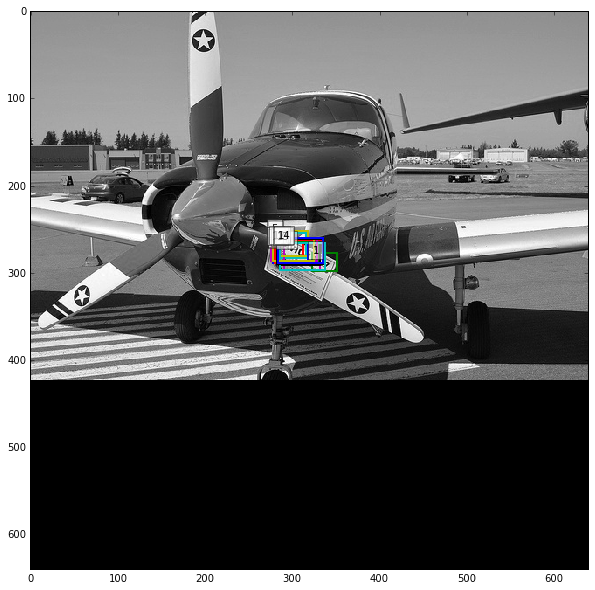

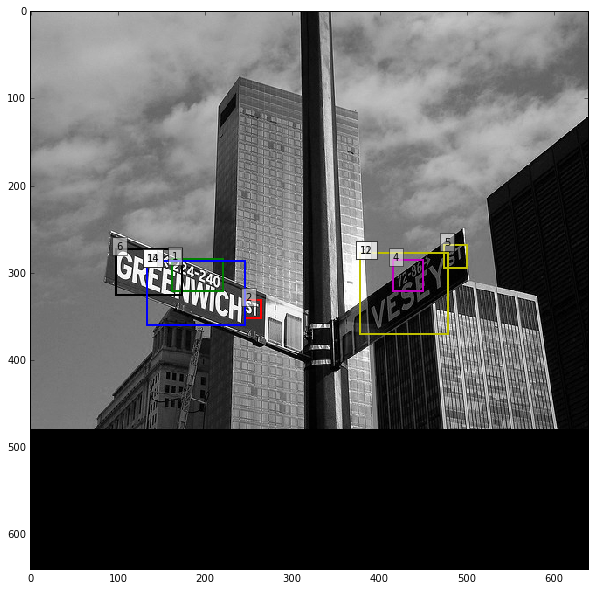

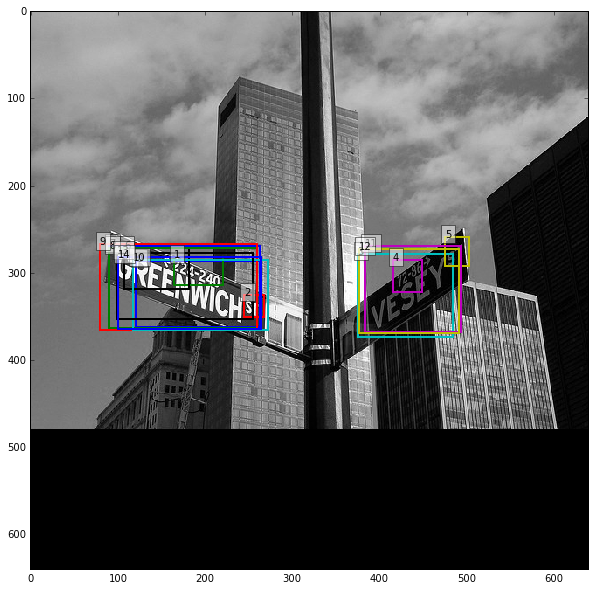

In [5]:
# Plot the input image with the ground truth labels
label_out = net_combo.blobs['label'].data[0,0,:,:]
batch_idx_num = label_out[:,0]
batch_with_words = np.unique(batch_idx_num)
num_batch_used = len(batch_with_words)

batch_imgs = net_combo.blobs['data_pad'].data
pred_box = net_combo.blobs['pred_bbox'].data
max_matches = pred_box.shape[2]
gt_word_labels = net_combo.blobs['gt_word_label'].data[:,:,0]

for i in range(0,num_batch_used):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    img_num = int(batch_with_words[i])
    img_use = batch_imgs[img_num,1,:,:]
    pred_box_used = pred_box[i,:,:,0]
    
    height = gt_word_labels[i*max_matches,8]
    width = gt_word_labels[i*max_matches,9]
    
    
    plt.figure()
    plt.imshow(img_use)
    currentAxis = plt.gca()
    for k in range(0,max_matches):
        xmin = int(round(gt_word_labels[i*max_matches+k,3]*width))
        ymin = int(round(gt_word_labels[i*max_matches+k,4]*height))
        xmax = int(round(gt_word_labels[i*max_matches+k,5]*width))
        ymax = int(round(gt_word_labels[i*max_matches+k,6]*height))
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[k % len(colors)]
        name = '%d'%k
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, name, bbox={'facecolor':'white', 'alpha':0.5})
        
    pred_num = 0
    plt.figure()
    plt.imshow(img_use)
    currentAxis = plt.gca()
    for k in range(0,max_matches):
        xmin = int(round(pred_box_used[0,k]*width))
        ymin = int(round(pred_box_used[1,k]*height))
        xmax = int(round(pred_box_used[2,k]*width))
        ymax = int(round(pred_box_used[3,k]*height))
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[k % len(colors)]
        name = '%d'%k
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, name, bbox={'facecolor':'white', 'alpha':0.5})

hocolite               
dreams                 
a                      
durk                   
supaigges              
cilk                   
snoota                 
silk                   
silk                   
silk                   
silk                   
silk                   
silk                   
silk                   
silk                   


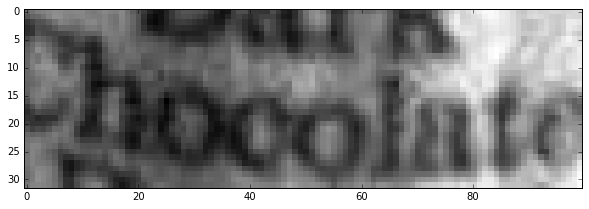

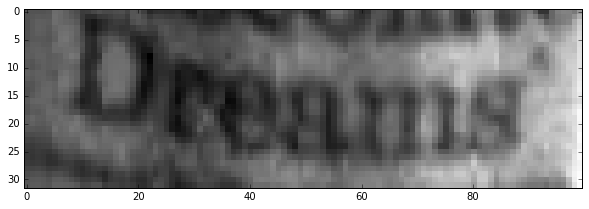

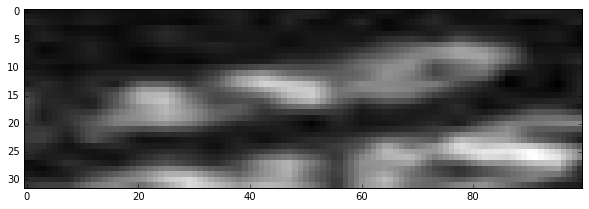

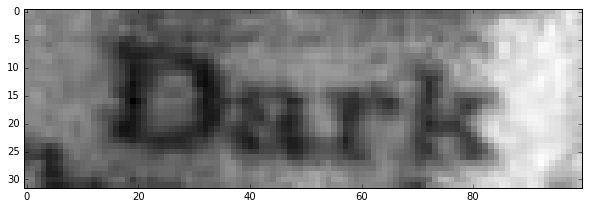

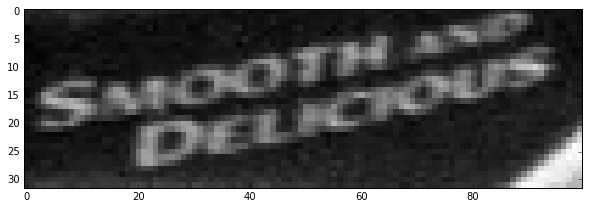

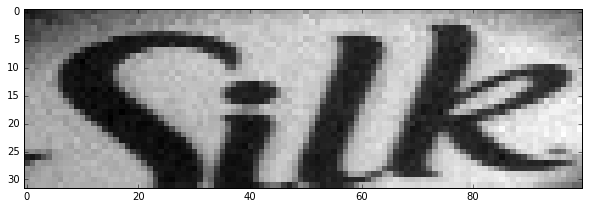

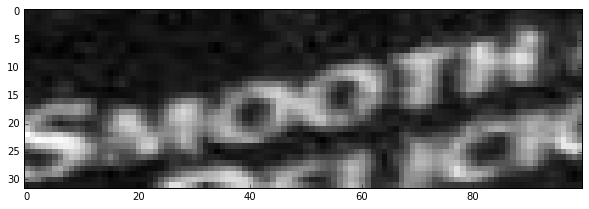

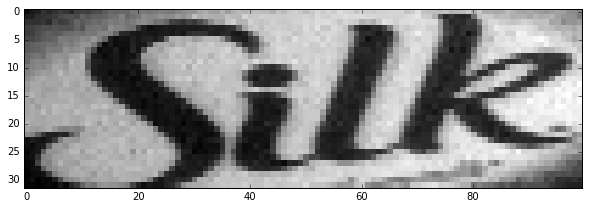

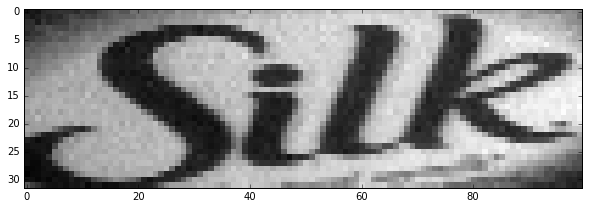

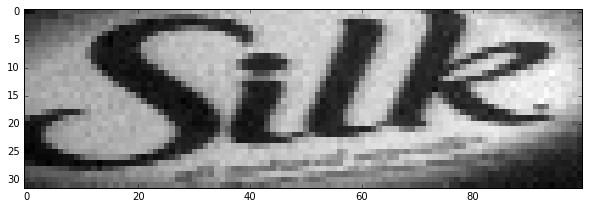

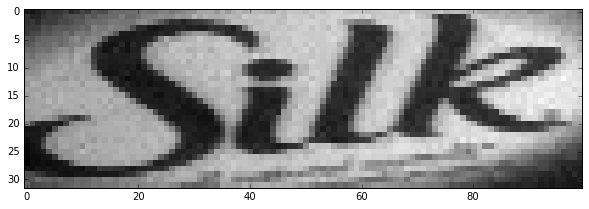

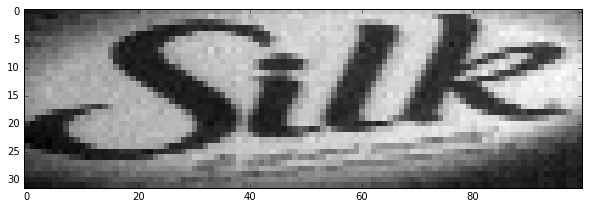

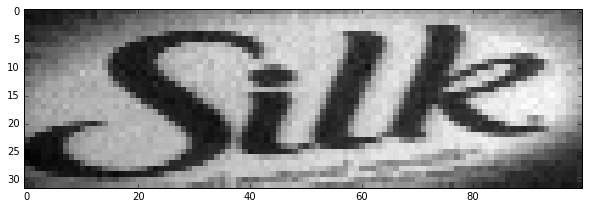

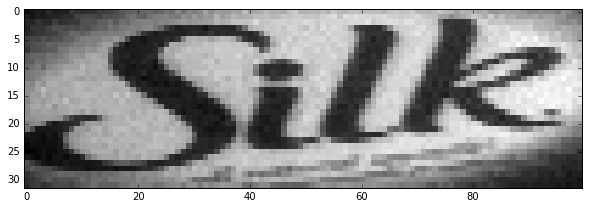

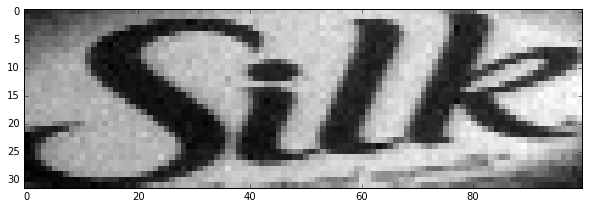

In [6]:
data_out = net_combo.blobs['data_transform'].data 
output = net_combo.blobs['reshape'].data
img_num_use = 6
words_final = []
for k in range(0,max_matches):
    text_out = np.reshape(output[img_num_use*max_matches+k,:,:,:],(39,23))
    text_max = np.argmax(text_out, axis=0) 
    output_word = ''
    for j in range(0,23):
        output_word = output_word + CAFFE_LABEL_TO_CHAR_MAP[text_max[j]-1]
        
    words_final.append(output_word)
    print output_word
    plt.figure(k)
    plt.imshow(data_out[img_num_use*max_matches+k,0,:,:])